# mrmention 사이트 리뷰분석

 참조사이트
 - https://hyemin-kim.github.io/2020/08/29/E-Python-TextMining-2/

In [101]:
# !pip install matplotlib seaborn sklearn konlpy scikit-learn wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

from wordcloud import WordCloud, STOPWORDS

In [9]:
df_review = pd.read_csv('./data/mmention_review_20240109.csv')
df_review

,name,review,review_date,star,ammen
0,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',한달살기 하면서 날씨도 좋고 모든게 좋았습니다~~단지내에 계시던 주민모두 너무 친절...,2022년 12월,20.0,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...
1,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',"일년을 고민 끝에 떠난 제주도,,,\n자는 곳이 제일 중해서 고심 끝에 결정했습니다...",2022년 12월,20.0,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...
2,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',퇴사하고 퇴직금 털어서 부모님 모시고 다녀왔습니다.\n독채는 신경쓸게 많을 것 같아...,2022년 12월,20.0,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...
3,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',9/1부터 2주간 제주에서 지내기 위해서 정한 스테이입니다. 큰도로에서 좀 들어와 ...,2022년 9월,20.0,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...
4,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',4층이지만 엘리베이터가 있어서 전혀불편함 없이 생활했어요. 스테이상태가 너무좋아서 ...,2022년 6월,20.0,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...
...,...,...,...,...,...
3675,[제주시] 신축풀옵숙소 한달살기 '라온스테이',사실과다른내용이면 고지없이 삭제한다니 마음에들지 않으면 지우겠다는거네요 알아서 ...,2020년 11월,20.0,생활시설 주차장 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락 세면도구 ...
3676,[제주시] 신축풀옵숙소 한달살기 '라온스테이',시외버스터미널과 가까워서 제주 어디로든 대중교통을 이용해 이동하기 편해요. 방도 두...,2022년 11월,16.0,생활시설 주차장 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락 세면도구 ...
3677,[제주시] 신축풀옵숙소 한달살기 '라온스테이',일반 원투룸형 숙소로 공항에서 가깝고 주차도 편리하다.. 주택가라 조용해서 좋았는데...,2022년 9월,16.0,생활시설 주차장 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락 세면도구 ...
3678,[제주시] 신축풀옵숙소 한달살기 '라온스테이',공항에서 택시비 5000원도 안나와요 \r\n도착첫날이나 마지막날 이용하기 좋아요\...,2022년 6월,16.0,생활시설 주차장 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락 세면도구 ...


In [3]:
df_base = pd.read_csv('./data/mmention_ver1.csv')
df_base

,name,ammen,title,condition,rating,reviewNum,location
0,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',6박,4.7,18.0,한림읍
1,[친환경 숙소] [제주/애월] #최대18명 #방5개 부엌2개 #워크샵 #대가족 #단...,생활시설 주차장 TV 케이블 TV 에어컨 와이파이 욕조 세탁기 (개인) 도어락 세면...,[친환경 숙소] [제주/애월] #최대18명 #방5개 부엌2개 #워크샵 #대가족 #단...,6박,4.7,24.0,애월읍
2,[제주/제주시] #신축 레지던스 #제주시내 초근접 #공항10분거리 #취사가능 : ...,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...,[제주/제주시] #신축 레지던스 #제주시내 초근접 #공항10분거리 #취사가능 : ...,6박,4.8,245.0,노형동
3,[서귀포/안덕] #프리미엄 스테이 #중문관광단지 인접 #소파 #엔티크 인테리어 알리...,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...,[서귀포/안덕] #프리미엄 스테이 #중문관광단지 인접 #소파 #엔티크 인테리어 알리...,14박,4.5,82.0,안덕면
4,[제주시] 제주공항 근처 나만 알고 싶은 포근한 대가족 펜션 / 키즈 펜션,생활시설 주차장 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 건조기 도어락 세...,[제주시] 제주공항 근처 나만 알고 싶은 포근한 대가족 펜션 / 키즈 펜션,6박,5.0,75.0,신비마을1길
...,...,...,...,...,...,...,...
118,[제주/한림] 해넘이달 렌탈하우스,생활시설 주차장 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 수건 헤어 드라이...,[제주/한림] 해넘이달 렌탈하우스,6박,5.0,11.0,한림읍
119,[제주/애월] 오션뷰 풀옵션 타운하우스 / 야외 족욕까지 매력적인 트윈픽스,생활시설 주차장 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 건조기 도어락 세...,[제주/애월] 오션뷰 풀옵션 타운하우스 / 야외 족욕까지 매력적인 트윈픽스,29박,4.8,4.0,애월읍
120,[제주/애월] 제주 솔한옥,생활시설 주차장 TV 에어컨 와이파이 세탁기 (개인) 세면도구 수건 헤어 드라이기 ...,[제주/애월] 제주 솔한옥,6박,4.9,103.0,애월읍
121,"[제주/한림] 반려견과 함께 비양도를 내 품안에, 해피데이",생활시설 주차장 TV 케이블 TV 에어컨 와이파이 세면도구 수건 헤어 드라이기 세탁...,"[제주/한림] 반려견과 함께 비양도를 내 품안에, 해피데이",6박,4.7,56.0,한림읍


In [10]:
df = pd.merge(df_review, df_base, how = 'left', on = ['name', 'ammen'])
df

,name,review,review_date,star,ammen,title,condition,rating,reviewNum,location
0,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',한달살기 하면서 날씨도 좋고 모든게 좋았습니다~~단지내에 계시던 주민모두 너무 친절...,2022년 12월,20.0,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',6박,4.7,18.0,한림읍
1,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',"일년을 고민 끝에 떠난 제주도,,,\n자는 곳이 제일 중해서 고심 끝에 결정했습니다...",2022년 12월,20.0,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',6박,4.7,18.0,한림읍
2,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',퇴사하고 퇴직금 털어서 부모님 모시고 다녀왔습니다.\n독채는 신경쓸게 많을 것 같아...,2022년 12월,20.0,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',6박,4.7,18.0,한림읍
3,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',9/1부터 2주간 제주에서 지내기 위해서 정한 스테이입니다. 큰도로에서 좀 들어와 ...,2022년 9월,20.0,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',6박,4.7,18.0,한림읍
4,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',4층이지만 엘리베이터가 있어서 전혀불편함 없이 생활했어요. 스테이상태가 너무좋아서 ...,2022년 6월,20.0,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',6박,4.7,18.0,한림읍
...,...,...,...,...,...,...,...,...,...,...
3675,[제주시] 신축풀옵숙소 한달살기 '라온스테이',사실과다른내용이면 고지없이 삭제한다니 마음에들지 않으면 지우겠다는거네요 알아서 ...,2020년 11월,20.0,생활시설 주차장 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락 세면도구 ...,[제주시] 신축풀옵숙소 한달살기 '라온스테이',6박,4.5,10.0,공설로5길
3676,[제주시] 신축풀옵숙소 한달살기 '라온스테이',시외버스터미널과 가까워서 제주 어디로든 대중교통을 이용해 이동하기 편해요. 방도 두...,2022년 11월,16.0,생활시설 주차장 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락 세면도구 ...,[제주시] 신축풀옵숙소 한달살기 '라온스테이',6박,4.5,10.0,공설로5길
3677,[제주시] 신축풀옵숙소 한달살기 '라온스테이',일반 원투룸형 숙소로 공항에서 가깝고 주차도 편리하다.. 주택가라 조용해서 좋았는데...,2022년 9월,16.0,생활시설 주차장 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락 세면도구 ...,[제주시] 신축풀옵숙소 한달살기 '라온스테이',6박,4.5,10.0,공설로5길
3678,[제주시] 신축풀옵숙소 한달살기 '라온스테이',공항에서 택시비 5000원도 안나와요 \r\n도착첫날이나 마지막날 이용하기 좋아요\...,2022년 6월,16.0,생활시설 주차장 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락 세면도구 ...,[제주시] 신축풀옵숙소 한달살기 '라온스테이',6박,4.5,10.0,공설로5길


In [11]:
df['star'] = df['star'].apply(lambda x: int(x/4))
df.head(3)

,name,review,review_date,star,ammen,title,condition,rating,reviewNum,location
0,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',한달살기 하면서 날씨도 좋고 모든게 좋았습니다~~단지내에 계시던 주민모두 너무 친절...,2022년 12월,5,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',6박,4.7,18.0,한림읍
1,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',"일년을 고민 끝에 떠난 제주도,,,\n자는 곳이 제일 중해서 고심 끝에 결정했습니다...",2022년 12월,5,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',6박,4.7,18.0,한림읍
2,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',퇴사하고 퇴직금 털어서 부모님 모시고 다녀왔습니다.\n독채는 신경쓸게 많을 것 같아...,2022년 12월,5,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',6박,4.7,18.0,한림읍


In [12]:
# review 열 결측치 확인
df[df['review'] == 'error']

,name,review,review_date,star,ammen,title,condition,rating,reviewNum,location


## 분석 시작

#### 리뷰 긍부정

In [16]:
df['review'][0]

'한달살기 하면서 날씨도 좋고 모든게 좋았습니다~~단지내에 계시던 주민모두 너무 친절 하셨구요~직접 기른 상추,고추 등등 쌈 야채도 챙겨주시고 아이들은 잔디에서 매뚜기 방아깨비 달팽이도 잡고 아주 즐거워 했습니다~단점이라면 마트가 거리가 좀 있는데 치킨같은것도 배달 전부 되고 택배도 잘 받고 보내고 했습니다~~또 가고 싶네요~^^'

### 전처리 시작

In [17]:
def hangul_function(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [18]:
hangul_function(df['review'][0])

'한달살기 하면서 날씨도 좋고 모든게 좋았습니다단지내에 계시던 주민모두 너무 친절 하셨구요직접 기른 상추고추 등등 쌈 야채도 챙겨주시고 아이들은 잔디에서 매뚜기 방아깨비 달팽이도 잡고 아주 즐거워 했습니다단점이라면 마트가 거리가 좀 있는데 치킨같은것도 배달 전부 되고 택배도 잘 받고 보내고 했습니다또 가고 싶네요'

In [19]:
from konlpy.tag import Okt
from collections import Counter

In [20]:
okt = Okt()  # 명사 형태소 추출 함수
nouns = okt.nouns(hangul_function(df['review'][0]))
nouns

['달',
 '살기',
 '날씨',
 '모든',
 '주민',
 '모두',
 '친절',
 '직접',
 '상추',
 '고추',
 '등등',
 '쌈',
 '야채',
 '아이',
 '잔디',
 '뚜기',
 '방아깨비',
 '달팽이',
 '잡고',
 '아주',
 '단점',
 '라면',
 '마트',
 '거리',
 '좀',
 '치킨',
 '배달',
 '전부',
 '택배',
 '또']

In [21]:
# review 전체
# 말뭉치 생성
corpus = "".join(df['review'].tolist())

In [23]:
nouns = okt.nouns(hangul_function(corpus))
counter = Counter(nouns)
counter.most_common(10)


[('숙소', 2582),
 ('곳', 1251),
 ('달', 1176),
 ('정말', 1144),
 ('수', 1069),
 ('것', 1018),
 ('사장', 955),
 ('제주', 889),
 ('여행', 881),
 ('동안', 864)]

In [24]:
# 2글자 이상인 단어중 가장 많이 나오는 단어를 보여주기

available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(20)


[('숙소', 2582),
 ('정말', 1144),
 ('사장', 955),
 ('제주', 889),
 ('여행', 881),
 ('동안', 864),
 ('위치', 838),
 ('주변', 740),
 ('바다', 728),
 ('다음', 718),
 ('아이', 694),
 ('제주도', 684),
 ('시설', 634),
 ('살기', 605),
 ('이용', 598),
 ('바로', 591),
 ('생각', 539),
 ('근처', 501),
 ('조금', 483),
 ('시간', 481)]

In [119]:
web_stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
web_stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [176]:
with open('./stopwords_korean.txt', encoding='utf-8') as file:
    korean_stopwords = file.read()

korean_stopwords = set(korean_stopwords.split("\n"))

In [177]:
stopwords = set([])
for i in web_stopwords:
    stopwords.add(i[0])

len(stopwords)


594

In [178]:
stopwords.update(korean_stopwords)
len(stopwords)

595

In [190]:
# 불용어 추가
jeju_stopwords = ['제주', '제주도', '호텔', '리뷰', '숙소', '여행', '트립',
                   '정말', '동안', '다음', '바로', '근처', '조금', '시간',
                   '호스트', '펜션', '정도', '방문', '사장', '이용', '다시',
                   '예약', '살이', '살기', '아주', '추천',
                   '처음', '달동', '저희', '하나', '사용', '모두', '진짜',
                   '일주일', '보름', '선택',
                   '제외', '이동', '무엇', '준비', '그냥', '감사', '생각', '느낌', '덕분', '후기', '기회',
                   '미스터', '미스터멘션', '멘션']
for word in jeju_stopwords:
    stopwords.add(word)


In [191]:
# 여러번 반복후 불용어 추가
result = [word for word in nouns if not word in jeju_stopwords]
counter = Counter(result)
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(30)

[('위치', 838),
 ('주변', 740),
 ('바다', 728),
 ('아이', 694),
 ('시설', 634),
 ('아침', 438),
 ('거리', 427),
 ('가족', 427),
 ('사진', 417),
 ('맛집', 354),
 ('관리', 347),
 ('산책', 339),
 ('마음', 335),
 ('생활', 327),
 ('청소', 321),
 ('화장실', 316),
 ('마트', 309),
 ('힐링', 309),
 ('걱정', 305),
 ('편의점', 303),
 ('주차', 303),
 ('가격', 290),
 ('주인', 276),
 ('마당', 276),
 ('혼자', 272),
 ('추억', 256),
 ('침대', 252),
 ('카페', 252),
 ('건물', 241),
 ('편의', 232)]

In [192]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['review'].tolist())
word_list = vect.get_feature_names_out()
count_list = bow_vect.toarray().sum(axis=0)


d:\song\venvs\project1\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [193]:
word_list = vect.get_feature_names_out()
count_list = bow_vect.toarray().sum(axis=0)

In [195]:
word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'가가': 3,
 '가게': 44,
 '가격': 290,
 '가구': 54,
 '가기': 91,
 '가까이': 140,
 '가끔': 53,
 '가나': 10,
 '가늠': 2,
 '가능': 26,
 '가도': 25,
 '가동': 3,
 '가드': 1,
 '가득': 31,
 '가든': 11,
 '가라': 10,
 '가락': 1,
 '가량': 3,
 '가려움': 1,
 '가로': 3,
 '가로등': 6,
 '가로수길': 1,
 '가루': 3,
 '가림': 2,
 '가마솥': 2,
 '가면': 101,
 '가바': 2,
 '가방': 4,
 '가보': 7,
 '가분': 1,
 '가사': 1,
 '가성': 144,
 '가세': 2,
 '가스': 36,
 '가스레인지': 2,
 '가스렌지': 3,
 '가스실': 1,
 '가스요금': 2,
 '가스전': 1,
 '가스통': 1,
 '가슴': 4,
 '가습기': 2,
 '가시': 10,
 '가신': 2,
 '가안': 1,
 '가야': 25,
 '가업': 2,
 '가옥': 2,
 '가요': 52,
 '가요제': 1,
 '가용': 2,
 '가우리': 1,
 '가운데': 6,
 '가위': 2,
 '가을': 43,
 '가이드': 21,
 '가이드북': 7,
 '가일': 1,
 '가입': 3,
 '가장': 121,
 '가재': 1,
 '가전': 20,
 '가전제품': 23,
 '가정': 21,
 '가족': 427,
 '가족사진': 23,
 '가지': 119,
 '가지각색': 1,
 '가추': 1,
 '가축': 1,
 '가치': 4,
 '가택': 1,
 '가파도': 3,
 '가파르': 1,
 '가파르긴': 1,
 '가품': 1,
 '각방': 6,
 '각별': 1,
 '각오': 2,
 '간간이': 1,
 '간격': 9,
 '간곳': 1,
 '간다': 44,
 '간단': 1,
 '간만': 5,
 '간물때': 1,
 '간발': 1,
 '간선': 1,
 '간섭': 6,
 '간세': 1,
 '간식': 10,
 '간의': 1,
 '간이': 4,

In [196]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)


In [197]:
print(tf_idf_vect.shape)

(3680, 6809)


In [198]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])


  (0, 5992)	0.2430182228567115
  (0, 5813)	0.20419739629030587
  (0, 5807)	0.23583862853540088
  (0, 5446)	0.16176819749175195
  (0, 5285)	0.2519360291818133
  (0, 4913)	0.2380804349083744
  (0, 4900)	0.18799139503683174
  (0, 3852)	0.24871848070708324
  (0, 2967)	0.23172567359799734
  (0, 2355)	0.19379119125181676
  (0, 2328)	0.3149750226301573
  (0, 1989)	0.1651461734637735
  (0, 1810)	0.13068882421448114
  (0, 1627)	0.18567948725873917
  (0, 1606)	0.3149750226301573
  (0, 1212)	0.3149750226301573
  (0, 1184)	0.15867313498567243
  (0, 922)	0.16851017155616316
  (0, 408)	0.2519360291818133
  (0, 196)	0.12388358498472235


In [199]:
vect.vocabulary_

{'날씨': 922,
 '모든': 1989,
 '주민': 5285,
 '친절': 5813,
 '직접': 5446,
 '상추': 2967,
 '고추': 408,
 '야채': 3852,
 '잔디': 4900,
 '뚜기': 1606,
 '방아깨비': 2328,
 '달팽이': 1212,
 '잡고': 4913,
 '단점': 1184,
 '라면': 1627,
 '마트': 1810,
 '거리': 196,
 '치킨': 5807,
 '배달': 2355,
 '택배': 5992,
 '고민': 374,
 '제일': 5185,
 '고심': 385,
 '결정': 280,
 '결론': 276,
 '동네': 1438,
 '집도': 5484,
 '마음': 1792,
 '퇴사': 6058,
 '퇴직금': 6067,
 '부모님': 2596,
 '모시': 1999,
 '신경': 3544,
 '스테이': 3428,
 '주변': 5289,
 '편의': 6199,
 '시설': 3490,
 '일부': 4759,
 '식당': 3521,
 '흑심': 6789,
 '부원': 2607,
 '뚝배기': 1611,
 '주간': 5267,
 '위해': 4452,
 '도로': 1363,
 '위치': 4449,
 '애월협재곽': 3830,
 '해수욕장': 6499,
 '한림': 6424,
 '공원': 468,
 '애월': 3822,
 '해안': 6501,
 '정원': 5141,
 '금오름': 702,
 '새별오름': 2987,
 '상태': 2971,
 '그릇': 663,
 '냄비': 987,
 '주방': 5286,
 '구비': 563,
 '이불': 4620,
 '친정엄마': 5815,
 '걸레': 240,
 '청소': 5646,
 '넷플릭스': 1015,
 '인터넷': 4733,
 '티비': 6112,
 '온수': 4201,
 '냉수': 995,
 '수압': 3321,
 '안방': 3748,
 '거실': 204,
 '에어컨': 3969,
 '바람': 2200,
 '멀리': 1922,
 '바다': 2193,
 '여행객'

In [200]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')


{922: '날씨', 1989: '모든', 5285: '주민', 5813: '친절', 5446: '직접', 2967: '상추', 408: '고추', 3852: '야채', 4900:...


### 감정분류

<Axes: >

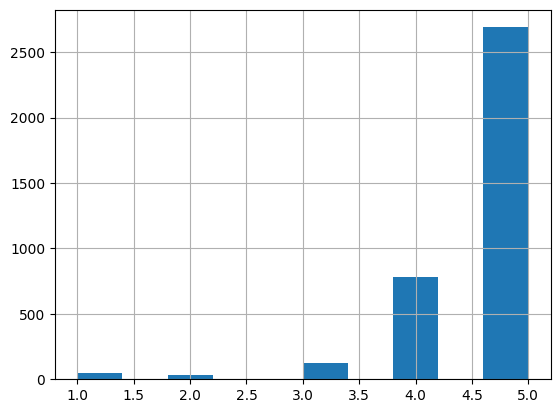

In [137]:
df['star'].hist()

In [138]:
def rating_to_label(rating):
    if rating > 3:
        return 1
    else:
        return 0
    
df['y'] = df['star'].apply(lambda x: rating_to_label(x))

In [85]:
df.head()

,name,review,review_date,star,ammen,title,condition,rating,reviewNum,location,y
0,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',한달살기 하면서 날씨도 좋고 모든게 좋았습니다~~단지내에 계시던 주민모두 너무 친절...,2022년 12월,5,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',6박,4.7,18.0,한림읍,1
1,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',"일년을 고민 끝에 떠난 제주도,,,\n자는 곳이 제일 중해서 고심 끝에 결정했습니다...",2022년 12월,5,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',6박,4.7,18.0,한림읍,1
2,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',퇴사하고 퇴직금 털어서 부모님 모시고 다녀왔습니다.\n독채는 신경쓸게 많을 것 같아...,2022년 12월,5,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',6박,4.7,18.0,한림읍,1
3,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',9/1부터 2주간 제주에서 지내기 위해서 정한 스테이입니다. 큰도로에서 좀 들어와 ...,2022년 9월,5,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',6박,4.7,18.0,한림읍,1
4,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',4층이지만 엘리베이터가 있어서 전혀불편함 없이 생활했어요. 스테이상태가 너무좋아서 ...,2022년 6월,5,생활시설 주차장 엘리베이터 TV 케이블 TV 에어컨 와이파이 세탁기 (개인) 도어락...,[제주/한림] #애견동반 가능 #논밭뷰 #복층다락방 '스테이 앤틱',6박,4.7,18.0,한림읍,1


In [86]:
df["y"].value_counts()

y
1    3474
0     206
Name: count, dtype: int64

### Training set / Test set 나누기

In [55]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [56]:
x_train.shape, y_train.shape

((2576, 6908), (2576,))

In [57]:
x_test.shape, y_test.shape

((1104, 6908), (1104,))

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

In [59]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))



accuracy: 0.94
precision: 0.94
recall: 1.00
F1: 0.97


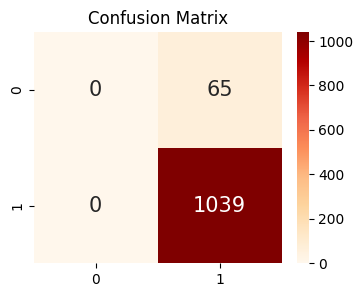

In [60]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [139]:
df['y'].value_counts()

y
1    3474
0     206
Name: count, dtype: int64

In [201]:
positive_random_idx = df[df['y']==1].sample(206, random_state=12).index.tolist()
negative_random_idx = df[df['y']==0].sample(206, random_state=12).index.tolist()



In [202]:
random_idx = positive_random_idx + negative_random_idx
x = tf_idf_vect[random_idx]
y = df['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)



In [203]:
x_train.shape, y_train.shape

((309, 6809), (309,))

In [204]:
x_test.shape, y_test.shape

((103, 6809), (103,))

In [205]:
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)


In [206]:
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))



accuracy: 0.79
precision: 0.71
recall: 0.89
F1: 0.79


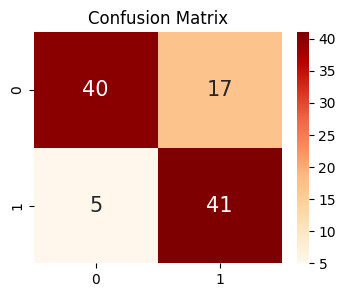

In [207]:
from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()


In [50]:
# 긍부정 키워드

In [208]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)
coef_pos_index


[(0.9242537365053682, 2193),
 (0.8300074490053749, 3721),
 (0.7792204335309139, 64),
 (0.7199883275674327, 1792),
 (0.6841285837546, 4877),
 (0.6307423551558384, 218),
 (0.6287902338816079, 2312),
 (0.5391159091362325, 1039),
 (0.5301941663637008, 5289),
 (0.525429970822921, 1989),
 (0.5241835248963652, 2902),
 (0.5111672267716928, 5730),
 (0.49466666641880386, 3575),
 (0.4881371506635062, 6287),
 (0.4589636538001535, 389),
 (0.4398503608755384, 4282),
 (0.4392687736518939, 5808),
 (0.43678779720993244, 1810),
 (0.4309890870611554, 1864),
 (0.43035054926851496, 456),
 (0.4276308939652972, 4990),
 (0.42650433925685705, 6482),
 (0.4182148142021385, 6199),
 (0.4008024270938567, 974),
 (0.3927703610596718, 6807),
 (0.39092024491775323, 5869),
 (0.3896402972865878, 62),
 (0.3816794702119539, 1326),
 (0.37838147482031753, 5925),
 (0.37772578249935046, 5322),
 (0.3725421902168804, 1900),
 (0.3689895936016821, 25),
 (0.3652457790930104, 4947),
 (0.36165914610532973, 980),
 (0.3486997779815601,

In [209]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer


{922: '날씨',
 1989: '모든',
 5285: '주민',
 5813: '친절',
 5446: '직접',
 2967: '상추',
 408: '고추',
 3852: '야채',
 4900: '잔디',
 1606: '뚜기',
 2328: '방아깨비',
 1212: '달팽이',
 4913: '잡고',
 1184: '단점',
 1627: '라면',
 1810: '마트',
 196: '거리',
 5807: '치킨',
 2355: '배달',
 5992: '택배',
 374: '고민',
 5185: '제일',
 385: '고심',
 280: '결정',
 276: '결론',
 1438: '동네',
 5484: '집도',
 1792: '마음',
 6058: '퇴사',
 6067: '퇴직금',
 2596: '부모님',
 1999: '모시',
 3544: '신경',
 3428: '스테이',
 5289: '주변',
 6199: '편의',
 3490: '시설',
 4759: '일부',
 3521: '식당',
 6789: '흑심',
 2607: '부원',
 1611: '뚝배기',
 5267: '주간',
 4452: '위해',
 1363: '도로',
 4449: '위치',
 3830: '애월협재곽',
 6499: '해수욕장',
 6424: '한림',
 468: '공원',
 3822: '애월',
 6501: '해안',
 5141: '정원',
 702: '금오름',
 2987: '새별오름',
 2971: '상태',
 663: '그릇',
 987: '냄비',
 5286: '주방',
 563: '구비',
 4620: '이불',
 5815: '친정엄마',
 240: '걸레',
 5646: '청소',
 1015: '넷플릭스',
 4733: '인터넷',
 6112: '티비',
 4201: '온수',
 995: '냉수',
 3321: '수압',
 3748: '안방',
 204: '거실',
 3969: '에어컨',
 2200: '바람',
 1922: '멀리',
 2193: '바다',
 4037:

In [210]:
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])



바다 0.9242537365053682
아침 0.8300074490053749
가족 0.7792204335309139
마음 0.7199883275674327
자주 0.6841285837546
걱정 0.6307423551558384
방도 0.6287902338816079
노을 0.5391159091362325
주변 0.5301941663637008
모든 0.525429970822921
산책 0.5241835248963652
추억 0.5111672267716928
신축 0.49466666641880386
풍경 0.4881371506635062
고요 0.4589636538001535
요다음 0.4398503608755384
친구 0.4392687736518939
마트 0.43678779720993244
맛집 0.4309890870611554
공기 0.43035054926851496


In [211]:
for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])



곰팡이 -1.235953841199412
청소 -1.0963471277576855
벌레 -0.8968955659534291
냄새 -0.8951345670201544
화장실 -0.8716957304298018
쓰레기 -0.8714739988180001
바퀴벌레 -0.861211049258104
가격 -0.80418736768842
참고 -0.7992551726701829
관리 -0.7836658032519151
소음 -0.7104780566934171
소리 -0.6901999540848364
바닥 -0.645538957223281
숙박 -0.6366735448814735
방충 -0.6365324303883392
창문 -0.6314752067579882
침대 -0.5917560269646813
위생 -0.5711072337455088
전기 -0.5587649882447012
때문 -0.5506792322372007


In [212]:
cloud_nouns = okt.nouns(hangul_function(corpus))
cloud_nouns = [x for x in cloud_nouns if len(x) > 1]  # 한글자 키워드 제거
cloud_nouns = [x for x in cloud_nouns if x not in stopwords]


In [213]:
cloud_nouns2 = " ".join(cloud_nouns)

In [214]:
# 워드 클라우드

wc = WordCloud(
    font_path='c://Windows/Fonts/gulim.ttc',
    background_color='white',
    max_words = 2000,
    stopwords = stopwords
).generate(cloud_nouns2)

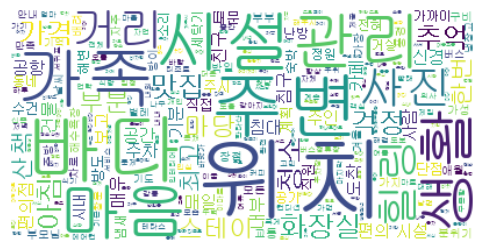

In [215]:
plt.figure(figsize=(6,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
